In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import calplot

In [2]:
# Load combined_df.pkl as a pandas dataframe called df
df = pd.read_pickle('../../combined_df.pkl')

In [3]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
focuscrime_df = df[df['Category'].isin(focuscrimes)].copy()
focuscrime_df['Year'] = focuscrime_df['Date'].dt.year
focuscrime_df['Year'].unique()

array([2004, 2005, 2010, 2013, 2017, 2016, 2006, 2009, 2012, 2003, 2007,
       2008, 2011, 2015, 2014, 2023, 2019, 2020, 2021, 2018, 2022, 2024,
       2025], dtype=int32)

In [5]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

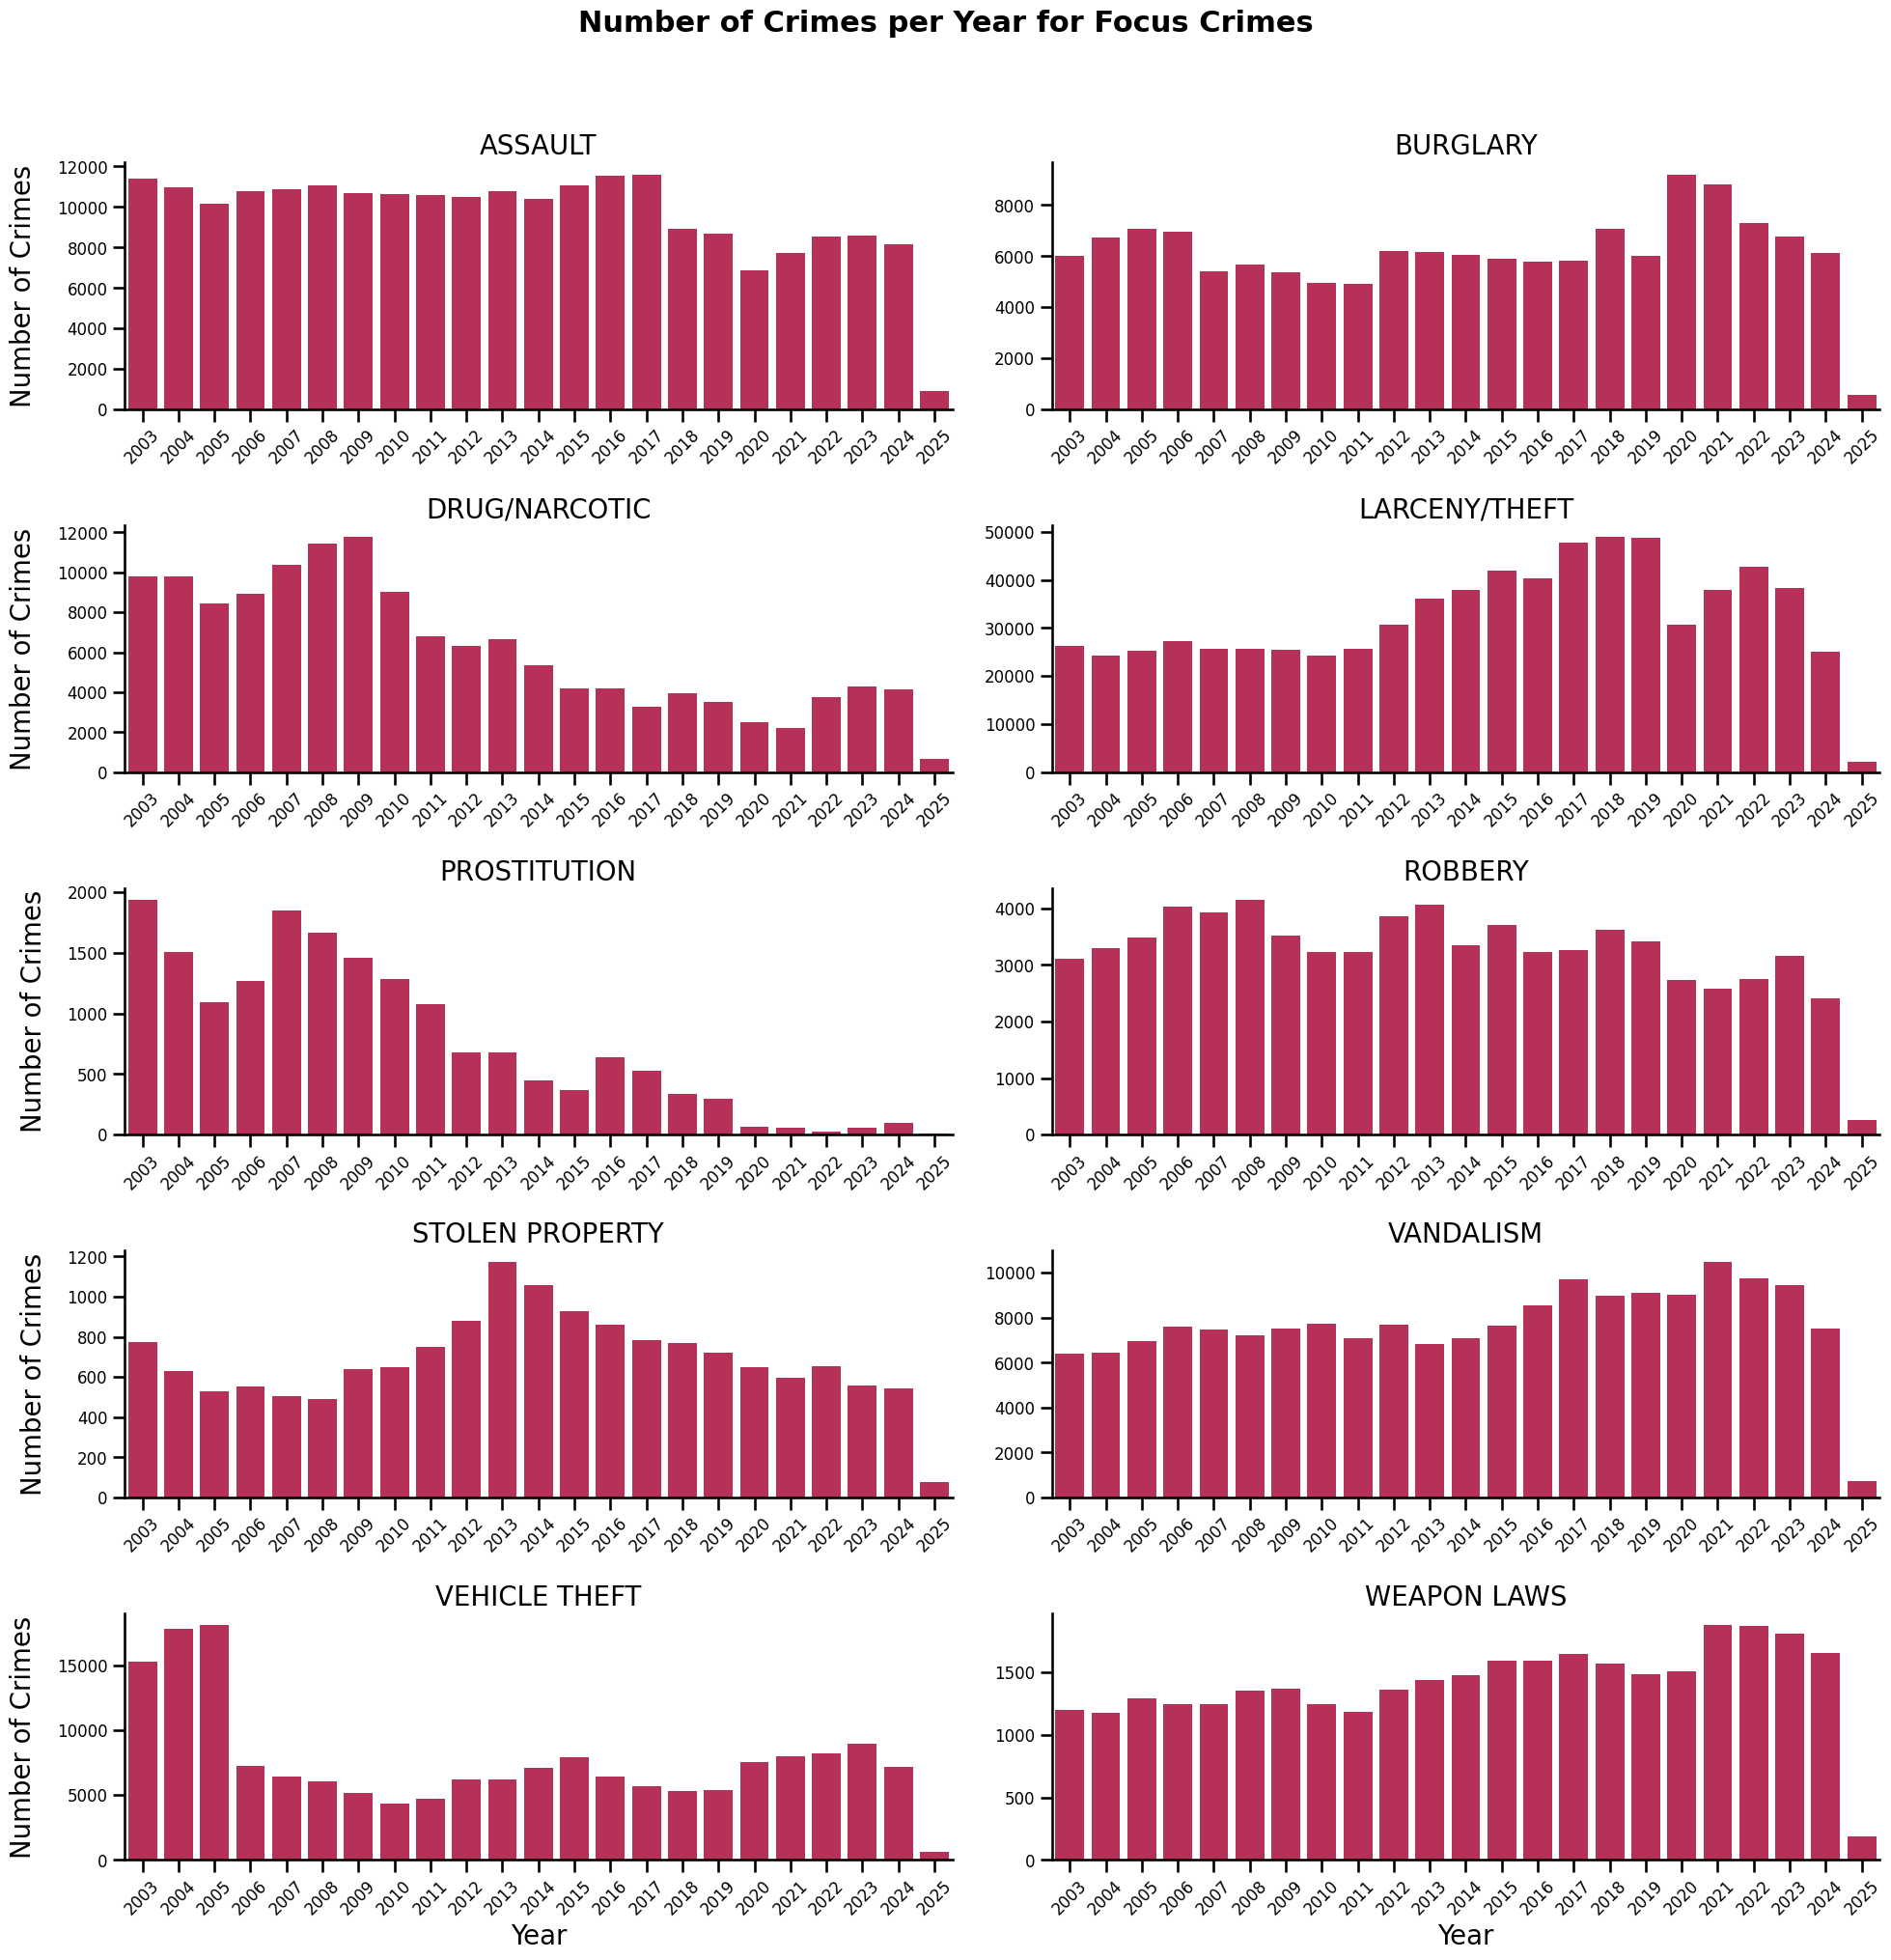

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Increase overall DPI for high-resolution rendering in notebooks
plt.rcParams['figure.dpi'] = 300

# Set context for talk-like presentation and update font settings
sns.set_context("talk", font_scale=1.1)
sns.set_style("whitegrid")  # Optional: use a clean grid style
plt.rcParams.update({
    'font.family': 'serif',  # Optional: change font family for publications
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter the DataFrame to only include focus crimes
focuscrimes = {'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 
               'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'}
focuscrime_df = df[df['Category'].isin(focuscrimes)].copy()

# Extract the year from the 'Date' column
focuscrime_df['Year'] = focuscrime_df['Date'].dt.year

# Group by 'Category' and 'Year' and count occurrences
crime_counts = (focuscrime_df.groupby(['Category', 'Year'])
                .size()
                .reset_index(name='Count'))

# Create a facet grid with free y-axis for each facet
g = sns.FacetGrid(crime_counts, col="Category", col_wrap=2, height=4, aspect=2.5, sharey=False, sharex=False)

# Extract a single color from the 'rocket' palette
rocket_color = sns.color_palette("rocket", 1)[0]

# Map a barplot to each facet
g.map_dataframe(sns.barplot, x="Year", y="Count", color=rocket_color)

# Customize axis labels and facet titles
g.set_axis_labels("Year", "Number of Crimes")
g.set_titles("{col_name}")

# Adjust spacing for y-axis label and tick labels
for ax in g.axes.flat:
    ax.yaxis.labelpad = 15
    ax.tick_params(axis='both', labelsize=12)
    # Rotate x-axis labels for readability
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    # Remove top and right spines for a cleaner look
    sns.despine(ax=ax)

# Add a main title for the entire figure
g.fig.suptitle("Number of Crimes per Year for Focus Crimes", fontsize=22, fontweight='bold', y=1.02)

# Tight layout to prevent overlaps
plt.tight_layout()

# Optionally, save the figure as a high-resolution image
#g.savefig("publication_quality_plot.png", dpi=300, bbox_inches="tight")

plt.show()


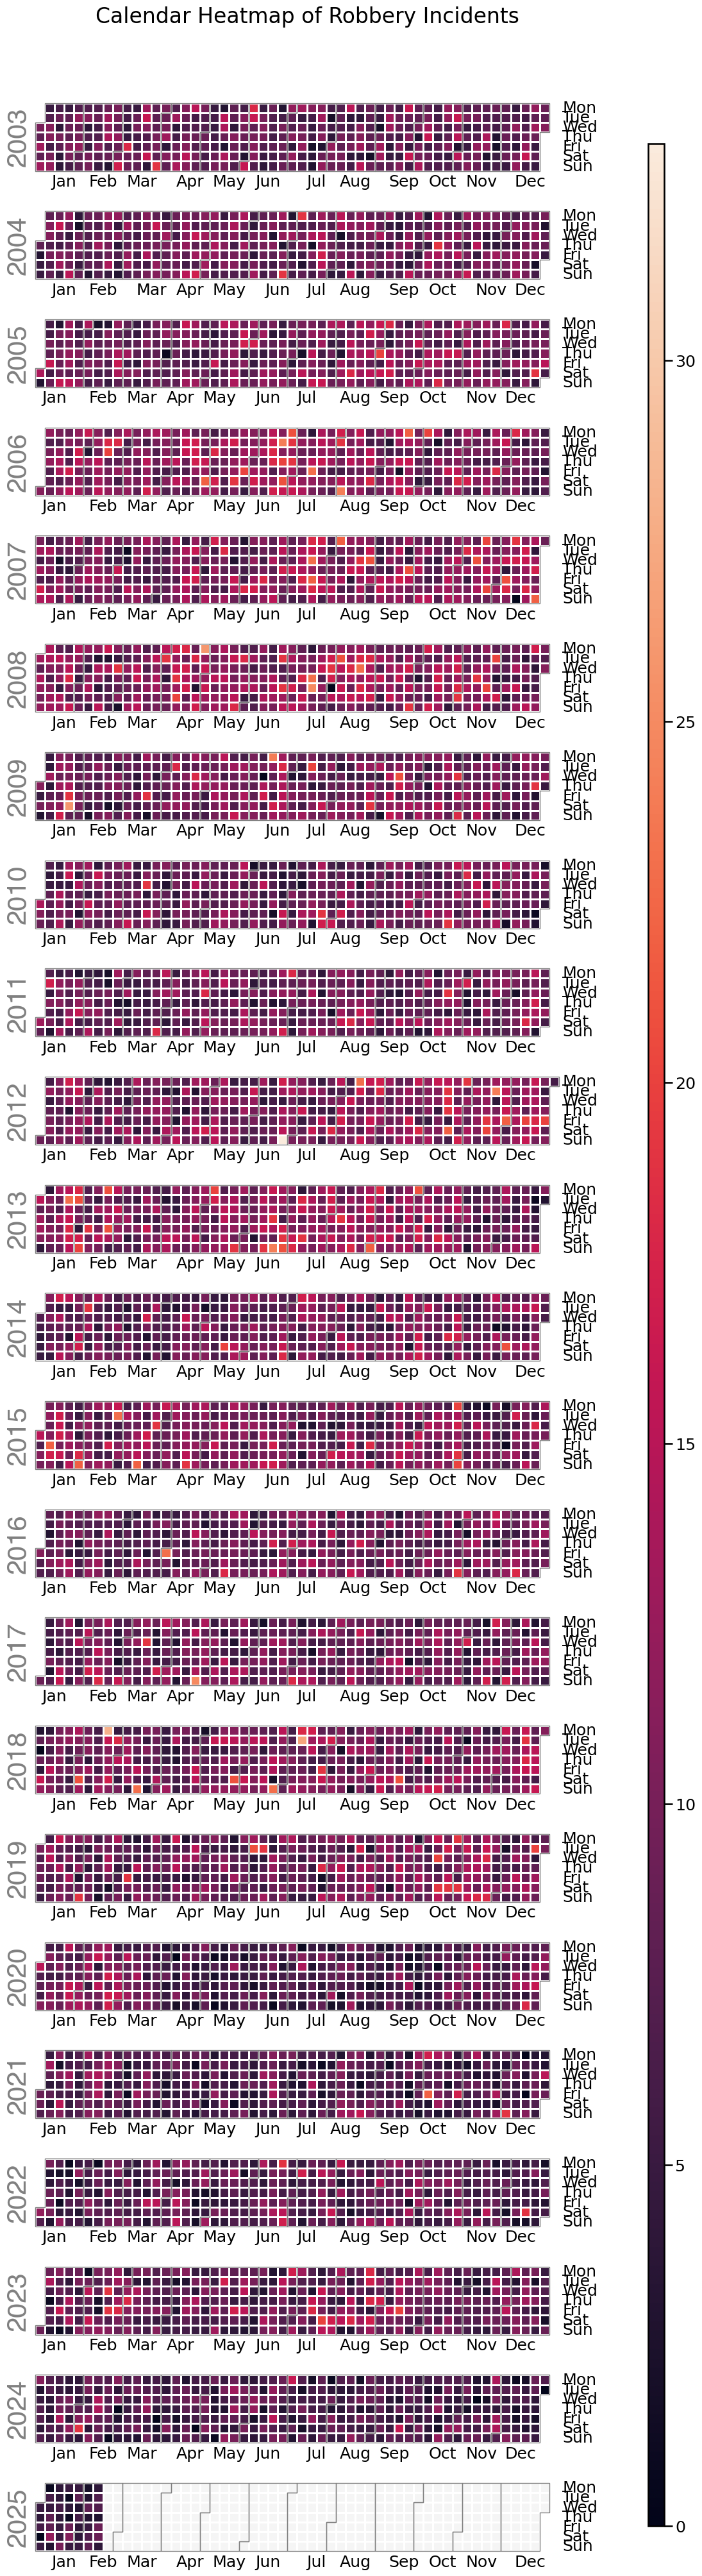

In [25]:
# --- Set up context and formatting ---
sns.set_context("talk", font_scale=1.1)

# --- Data preparation ---
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter the DataFrame for the 'ROBBERY' category
robbery_df = df[df['Category'] == 'ROBBERY'].copy()

# Group by the date (ignoring the time) and count occurrences per day
robbery_daily = robbery_df.groupby(robbery_df['Date'].dt.date).size()

# Convert the index to datetime to ensure calplot works correctly
robbery_daily.index = pd.to_datetime(robbery_daily.index)

# --- Create a rocket colormap using Seaborn ---
rocket_cmap = sns.color_palette("rocket", as_cmap=True)

# --- Plotting with calplot ---
calplot.calplot(
    robbery_daily,
    cmap=rocket_cmap,
    suptitle="Calendar Heatmap of Robbery Incidents"
)

plt.show()